# Q*-A* Experiment Analysis

This notebook analyzes the results from Q*-A* pathfinding experiments and generates tables and graphs for the Experimental Results section.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))


In [44]:
# Load results
df = pd.read_csv('../results/experiments.csv')
print(f"Total experiments: {len(df)}")
print("\nFirst few rows:")
df.head()


Total experiments: 8

First few rows:


,astar_cost,astar_expanded,astar_time_ms,wastar_cost,wastar_expanded,wastar_time_ms,wastar_cost_ratio,wastar_expansion_reduction,qstar_cost,qstar_expanded,qstar_time_ms,qstar_cost_ratio,qstar_expansion_reduction,width,height,density,q_episodes,beta
0,50.426407,270,0.778913,50.426407,40,0.140190,1.000000,85.185185,50.426407,270,2.665043,1.0,0.000000,35,35,0.2,1200,0.7
1,50.426407,238,0.670910,50.426407,42,0.142813,1.000000,82.352941,50.426407,240,2.383709,1.0,-0.840336,35,35,0.2,1200,0.7
2,49.840620,189,0.530958,49.840620,39,0.133038,1.000000,79.365079,49.840620,190,1.809120,1.0,-0.529101,35,35,0.2,1200,0.7
3,49.840620,207,0.607014,50.426407,39,0.139952,1.011753,81.159420,49.840620,209,2.171755,1.0,-0.966184,35,35,0.2,1200,0.7
4,50.426407,205,0.558138,51.012193,40,0.128984,1.011617,80.487805,50.426407,204,2.043009,1.0,0.487805,35,35,0.2,1200,0.7


In [45]:
# Performance Comparison Table
summary = pd.DataFrame({
    'Algorithm': ['A*', 'Weighted A*', 'Q*-A*'],
    'Mean Expansions': [
        df['astar_expanded'].mean(),
        df['wastar_expanded'].mean(),
        df['qstar_expanded'].mean()
    ],
    'Std Expansions': [
        df['astar_expanded'].std(),
        df['wastar_expanded'].std(),
        df['qstar_expanded'].std()
    ],
    'Mean Runtime (ms)': [
        df['astar_time_ms'].mean(),
        df['wastar_time_ms'].mean(),
        df['qstar_time_ms'].mean()
    ],
    'Std Runtime (ms)': [
        df['astar_time_ms'].std(),
        df['wastar_time_ms'].std(),
        df['qstar_time_ms'].std()
    ],
    'Mean Cost Ratio': [
        1.0,
        df['wastar_cost_ratio'].mean(),
        df['qstar_cost_ratio'].mean()
    ],
    'Mean Cost': [
        df['astar_cost'].mean(),
        df['wastar_cost'].mean(),
        df['qstar_cost'].mean()
    ],
    'Expansion Reduction %': [
        0.0,
        df['wastar_expansion_reduction'].mean(),
        df['qstar_expansion_reduction'].mean()
    ]
})

# Format for display
summary_display = summary.copy()
summary_display['Mean Expansions'] = summary_display['Mean Expansions'].round(1)
summary_display['Std Expansions'] = summary_display['Std Expansions'].round(1)
summary_display['Mean Runtime (ms)'] = summary_display['Mean Runtime (ms)'].round(3)
summary_display['Std Runtime (ms)'] = summary_display['Std Runtime (ms)'].round(3)
summary_display['Mean Cost Ratio'] = summary_display['Mean Cost Ratio'].round(4)
summary_display['Mean Cost'] = summary_display['Mean Cost'].round(2)
summary_display['Expansion Reduction %'] = summary_display['Expansion Reduction %'].round(2)

print("="*80)
print("PERFORMANCE COMPARISON TABLE")
print("="*80)
print(summary_display.to_string(index=False))
print("="*80)

# Save to CSV
summary.to_csv('../results/performance_table.csv', index=False)


PERFORMANCE COMPARISON TABLE
  Algorithm  Mean Expansions  Std Expansions  Mean Runtime (ms)  Std Runtime (ms)  Mean Cost Ratio  Mean Cost  Expansion Reduction %
         A*            215.6            27.0              0.616             0.085           1.0000      50.13                   0.00
Weighted A*             41.0             1.9              0.140             0.007           1.0117      50.72                  80.74
      Q*-A*            216.2            26.9              2.188             0.261           1.0000      50.13                  -0.30


In [46]:
# Goals vs Actual Results Table
goals = pd.DataFrame({
    'Metric': [
        'Node Expansion Reduction',
        'Runtime Reduction',
        'Path Cost Deviation'
    ],
    'Goal': [
        '≥30% (Research Question)\n≥15% (Success Criteria)',
        '≥30% (Research Question)\n≥15% (Success Criteria)',
        '≤5-10% (Research Question)\n≤10-20% (Success Criteria)'
    ],
    'Q*-A* Actual': [
        f"{df['qstar_expansion_reduction'].mean():.2f}%",
        f"{(1 - df['qstar_time_ms'].mean() / df['astar_time_ms'].mean()) * 100:.2f}%",
        f"{(df['qstar_cost_ratio'].mean() - 1.0) * 100:.2f}%"
    ],
    'Weighted A* Actual': [
        f"{df['wastar_expansion_reduction'].mean():.2f}%",
        f"{(1 - df['wastar_time_ms'].mean() / df['astar_time_ms'].mean()) * 100:.2f}%",
        f"{(df['wastar_cost_ratio'].mean() - 1.0) * 100:.2f}%"
    ],
    'Status': [
        '✓' if df['qstar_expansion_reduction'].mean() >= 15 else '✗',
        '✓' if (1 - df['qstar_time_ms'].mean() / df['astar_time_ms'].mean()) * 100 >= 15 else '✗',
        '✓' if abs((df['qstar_cost_ratio'].mean() - 1.0) * 100) <= 20 else '✗'
    ]
})

print("\n" + "="*80)
print("GOALS vs ACTUAL RESULTS")
print("="*80)
print(goals.to_string(index=False))
print("="*80)

# Save to CSV
goals.to_csv('../results/goals_vs_actual.csv', index=False)



GOALS vs ACTUAL RESULTS
                  Metric                                                   Goal Q*-A* Actual Weighted A* Actual Status
Node Expansion Reduction      ≥30% (Research Question)\n≥15% (Success Criteria)       -0.30%             80.74%      ✗
       Runtime Reduction      ≥30% (Research Question)\n≥15% (Success Criteria)     -255.39%             77.32%      ✗
     Path Cost Deviation ≤5-10% (Research Question)\n≤10-20% (Success Criteria)        0.00%              1.17%      ✓


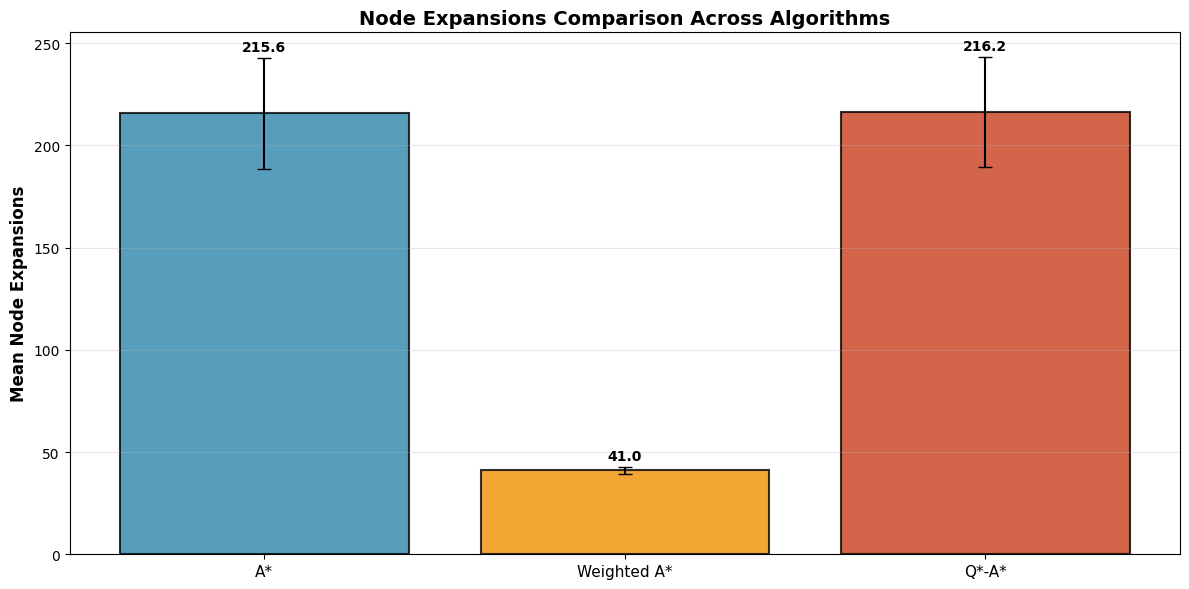

In [47]:
# 1. Node Expansions Comparison
plt.figure(figsize=(12, 6))
algorithms = ['A*', 'Weighted A*', 'Q*-A*']
expansions_mean = [df['astar_expanded'].mean(), df['wastar_expanded'].mean(), df['qstar_expanded'].mean()]
expansions_std = [df['astar_expanded'].std(), df['wastar_expanded'].std(), df['qstar_expanded'].std()]

bars = plt.bar(algorithms, expansions_mean, yerr=expansions_std, capsize=5, 
               color=['#2E86AB', '#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.ylabel('Mean Node Expansions', fontsize=12, fontweight='bold')
plt.title('Node Expansions Comparison Across Algorithms', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=11)

# Add value labels on bars
for i, (bar, mean, std) in enumerate(zip(bars, expansions_mean, expansions_std)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 2,
             f'{mean:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/expansions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


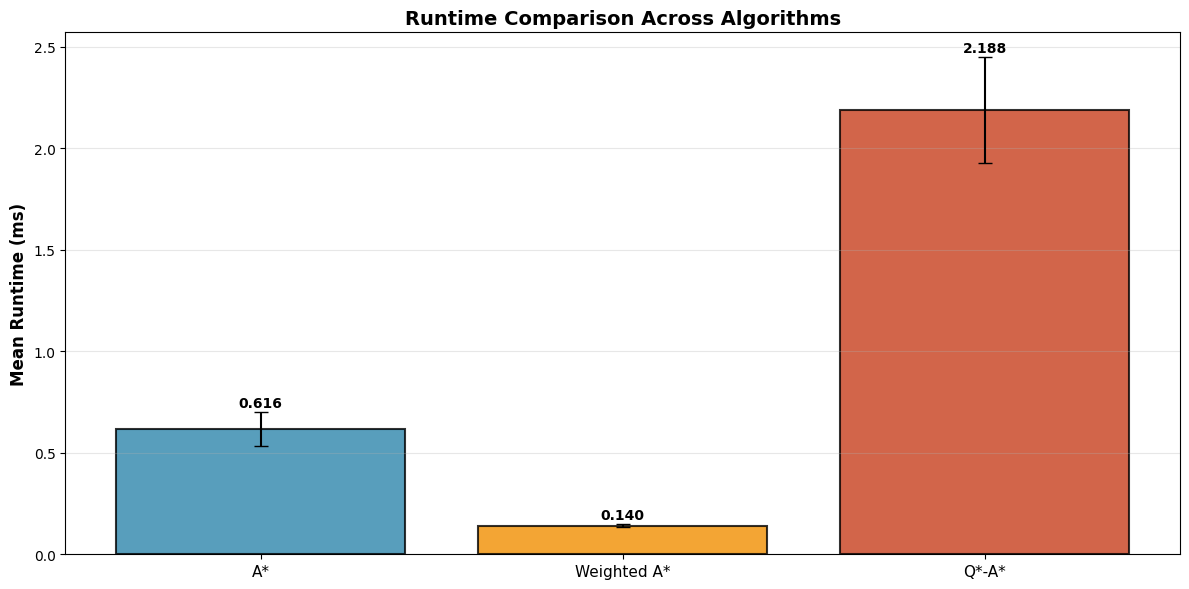

In [48]:
# 2. Runtime Comparison
plt.figure(figsize=(12, 6))
runtime_mean = [df['astar_time_ms'].mean(), df['wastar_time_ms'].mean(), df['qstar_time_ms'].mean()]
runtime_std = [df['astar_time_ms'].std(), df['wastar_time_ms'].std(), df['qstar_time_ms'].std()]

bars = plt.bar(algorithms, runtime_mean, yerr=runtime_std, capsize=5,
               color=['#2E86AB', '#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.ylabel('Mean Runtime (ms)', fontsize=12, fontweight='bold')
plt.title('Runtime Comparison Across Algorithms', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=11)

# Add value labels
for i, (bar, mean, std) in enumerate(zip(bars, runtime_mean, runtime_std)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01,
             f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/runtime_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


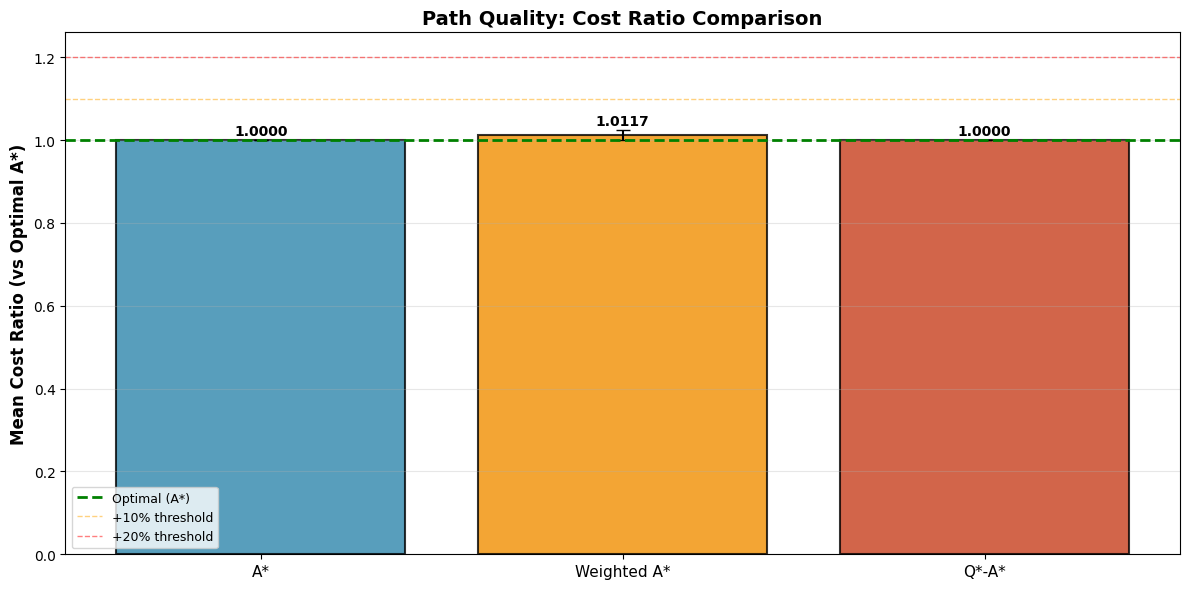

In [49]:
# 3. Cost Ratio Comparison (Path Quality)
plt.figure(figsize=(12, 6))
cost_ratios = [1.0, df['wastar_cost_ratio'].mean(), df['qstar_cost_ratio'].mean()]
cost_ratios_std = [0.0, df['wastar_cost_ratio'].std(), df['qstar_cost_ratio'].std()]

bars = plt.bar(algorithms, cost_ratios, yerr=cost_ratios_std, capsize=5,
               color=['#2E86AB', '#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.ylabel('Mean Cost Ratio (vs Optimal A*)', fontsize=12, fontweight='bold')
plt.title('Path Quality: Cost Ratio Comparison', fontsize=14, fontweight='bold')
plt.axhline(y=1.0, color='green', linestyle='--', linewidth=2, label='Optimal (A*)')
plt.axhline(y=1.1, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='+10% threshold')
plt.axhline(y=1.2, color='red', linestyle='--', linewidth=1, alpha=0.5, label='+20% threshold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=11)
plt.legend(fontsize=9)

# Add value labels
for i, (bar, mean, std) in enumerate(zip(bars, cost_ratios, cost_ratios_std)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.005,
             f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/cost_ratio_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


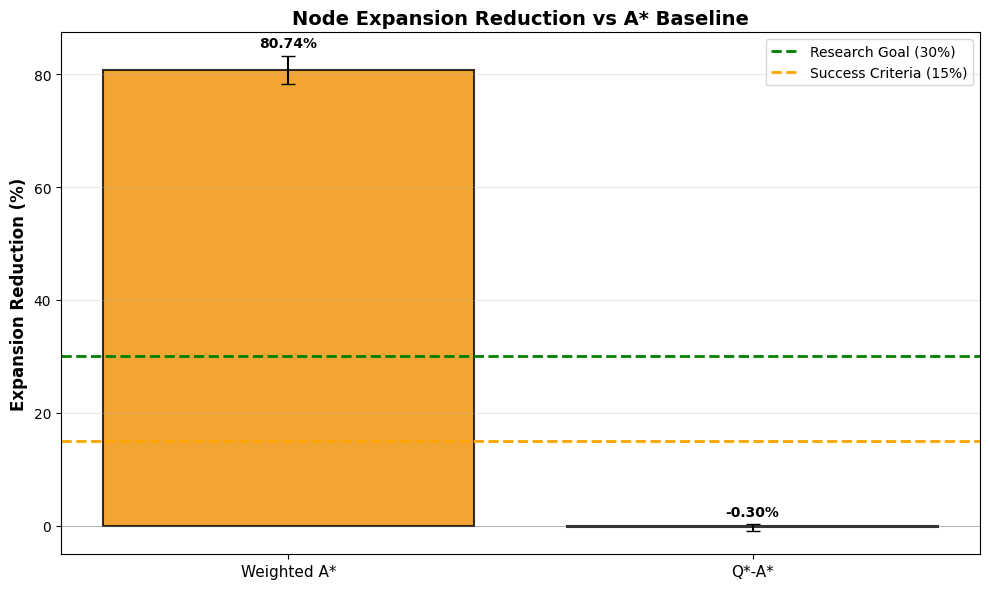

In [50]:
# 4. Expansion Reduction Percentage
plt.figure(figsize=(10, 6))
reduction_algs = ['Weighted A*', 'Q*-A*']
reduction_values = [df['wastar_expansion_reduction'].mean(), df['qstar_expansion_reduction'].mean()]
reduction_std = [df['wastar_expansion_reduction'].std(), df['qstar_expansion_reduction'].std()]

bars = plt.bar(reduction_algs, reduction_values, yerr=reduction_std, capsize=5,
               color=['#F18F01', '#C73E1D'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.ylabel('Expansion Reduction (%)', fontsize=12, fontweight='bold')
plt.title('Node Expansion Reduction vs A* Baseline', fontsize=14, fontweight='bold')
plt.axhline(y=30, color='green', linestyle='--', linewidth=2, label='Research Goal (30%)')
plt.axhline(y=15, color='orange', linestyle='--', linewidth=2, label='Success Criteria (15%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=11)
plt.legend(fontsize=10)

# Add value labels
for i, (bar, mean, std) in enumerate(zip(bars, reduction_values, reduction_std)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 1,
             f'{mean:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/expansion_reduction.png', dpi=300, bbox_inches='tight')
plt.show()


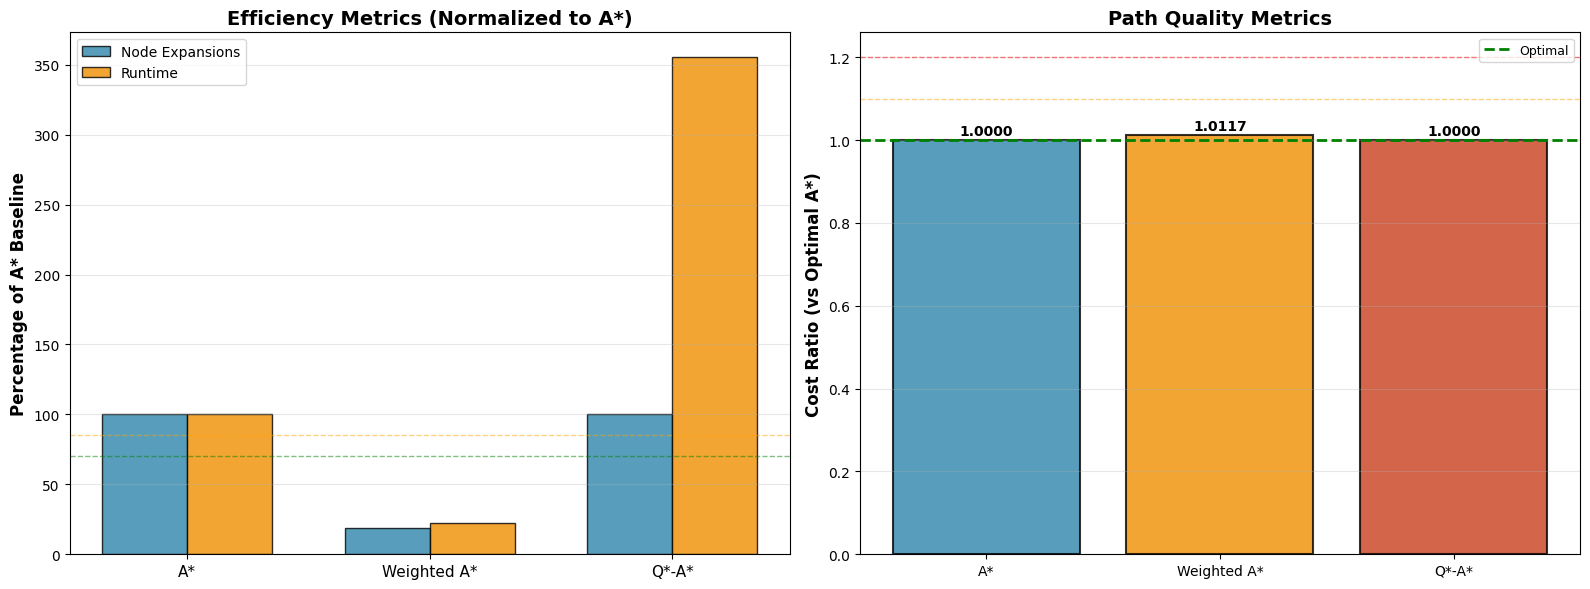

In [51]:
# 5. Combined Performance Metrics (Multi-bar chart)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Expansions and Runtime (normalized)
x = np.arange(len(algorithms))
width = 0.35

# Normalize for comparison (percentage of A*)
exp_norm = [100, df['wastar_expanded'].mean()/df['astar_expanded'].mean()*100, 
            df['qstar_expanded'].mean()/df['astar_expanded'].mean()*100]
time_norm = [100, df['wastar_time_ms'].mean()/df['astar_time_ms'].mean()*100,
             df['qstar_time_ms'].mean()/df['astar_time_ms'].mean()*100]

bars1 = ax1.bar(x - width/2, exp_norm, width, label='Node Expansions', color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, time_norm, width, label='Runtime', color='#F18F01', alpha=0.8, edgecolor='black')

ax1.set_ylabel('Percentage of A* Baseline', fontsize=12, fontweight='bold')
ax1.set_title('Efficiency Metrics (Normalized to A*)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms, fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=70, color='green', linestyle='--', linewidth=1, alpha=0.5, label='30% reduction')
ax1.axhline(y=85, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='15% reduction')

# Right: Cost ratios
cost_ratios = [1.0, df['wastar_cost_ratio'].mean(), df['qstar_cost_ratio'].mean()]
bars3 = ax2.bar(algorithms, cost_ratios, color=['#2E86AB', '#F18F01', '#C73E1D'], 
                alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Cost Ratio (vs Optimal A*)', fontsize=12, fontweight='bold')
ax2.set_title('Path Quality Metrics', fontsize=14, fontweight='bold')
ax2.axhline(y=1.0, color='green', linestyle='--', linewidth=2, label='Optimal')
ax2.axhline(y=1.1, color='orange', linestyle='--', linewidth=1, alpha=0.5)
ax2.axhline(y=1.2, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend(fontsize=9)

# Add value labels
for bar, val in zip(bars3, cost_ratios):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{val:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/combined_performance.png', dpi=300, bbox_inches='tight')
plt.show()


In [52]:
# 6. Performance Summary Table (Formatted for LaTeX/Markdown)
print("\n" + "="*100)
print("EXPERIMENTAL RESULTS SUMMARY")
print("="*100)
print("\nTable 1: Performance Comparison")
print("-" * 100)
print(summary_display.to_string(index=False))
print("\n" + "-" * 100)

print("\n\nTable 2: Goals vs Actual Results")
print("-" * 100)
print(goals.to_string(index=False))
print("\n" + "-" * 100)

# Calculate key statistics
qstar_exp_reduction = df['qstar_expansion_reduction'].mean()
qstar_time_reduction = (1 - df['qstar_time_ms'].mean() / df['astar_time_ms'].mean()) * 100
qstar_cost_deviation = (df['qstar_cost_ratio'].mean() - 1.0) * 100

print("\n\nKey Findings:")
print("-" * 100)
print(f"Q*-A* Expansion Reduction: {qstar_exp_reduction:.2f}%")
print(f"Q*-A* Runtime Reduction: {qstar_time_reduction:.2f}%")
print(f"Q*-A* Cost Deviation: {qstar_cost_deviation:.2f}%")
print(f"Q*-A* Optimal Paths Found: {(df['qstar_cost_ratio'] == 1.0).sum()}/{len(df)} ({(df['qstar_cost_ratio'] == 1.0).sum()/len(df)*100:.1f}%)")
print("-" * 100)



EXPERIMENTAL RESULTS SUMMARY

Table 1: Performance Comparison
----------------------------------------------------------------------------------------------------
  Algorithm  Mean Expansions  Std Expansions  Mean Runtime (ms)  Std Runtime (ms)  Mean Cost Ratio  Mean Cost  Expansion Reduction %
         A*            215.6            27.0              0.616             0.085           1.0000      50.13                   0.00
Weighted A*             41.0             1.9              0.140             0.007           1.0117      50.72                  80.74
      Q*-A*            216.2            26.9              2.188             0.261           1.0000      50.13                  -0.30

----------------------------------------------------------------------------------------------------


Table 2: Goals vs Actual Results
----------------------------------------------------------------------------------------------------
                  Metric                                          

In [54]:
import os, sys

# Asegúrate de que la raíz del proyecto está en el path
project_root = os.path.dirname(os.getcwd())
sys.path.insert(0, project_root)
print("Project root on sys.path:", project_root)

from src.geometry import build_grid_graph

# Grid 10x10 sin obstáculos
g, start, goal = build_grid_graph(10, 10, [], diagonal=True)

# Nodo del centro (5,5) → id = 5 + 5*10 = 55
node_id = 5 + 5 * 10

# Vecinos del grafo (incluye diagonales) — SIN duplicados
neigh_all_ids = sorted({v for v, _ in g.neighbors(node_id)})

# Vecinos cardinales (4 direcciones) — SIN duplicados
node_s = g.nodes[node_id]
xs, ys = node_s.x, node_s.y

neigh_card_ids = []
for v, cost in g.neighbors(node_id):
    node_v = g.nodes[v]
    dx = node_v.x - xs
    dy = node_v.y - ys
    if abs(dx) + abs(dy) == 1:  # SOLO 4 direcciones
        neigh_card_ids.append(v)

neigh_card_ids = sorted(set(neigh_card_ids))

print("Vecinos totales del grafo (incluye diagonales, únicos):", len(neigh_all_ids))
print(neigh_all_ids)

print("\nVecinos cardinales (4 direcciones, únicos):", len(neigh_card_ids))
print(neigh_card_ids)


Project root on sys.path: c:\Users\Danit\OneDrive\Documentos\Midterm2
Vecinos totales del grafo (incluye diagonales, únicos): 8
[44, 45, 46, 54, 56, 64, 65, 66]

Vecinos cardinales (4 direcciones, únicos): 4
[45, 54, 56, 65]


In [55]:
df[['astar_cost',
    'wastar_cost',
    'qstar_cost',
    'astar_expanded',
    'wastar_expanded',
    'qstar_expanded',
    'astar_time_ms',
    'wastar_time_ms',
    'qstar_time_ms']].mean()


astar_cost          50.133514
wastar_cost         50.719300
qstar_cost          50.133514
astar_expanded     215.625000
wastar_expanded     41.000000
qstar_expanded     216.250000
astar_time_ms        0.615627
wastar_time_ms       0.139624
qstar_time_ms        2.187848
dtype: float64

In [56]:
df[['wastar_cost_ratio', 'qstar_cost_ratio']].mean()


wastar_cost_ratio    1.011719
qstar_cost_ratio     1.000000
dtype: float64